In [1]:
"""
!git clone -b EMT https://github.com/pop756/Quantum_KAN.git
%cd Quantum_KAN
!pip install -r requirements.txt"""

fatal: destination path 'Quantum_KAN' already exists and is not an empty directory.
/content/Quantum_KAN


In [357]:
# Initialize your account
from qiskit_ibm_runtime import QiskitRuntimeService
import qiskit_ibm_provider

service = QiskitRuntimeService(instance="ibm-q/open/main")


backend = qiskit_ibm_provider.least_busy(service.backends())


In [358]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit import pulse
from qiskit import schedule

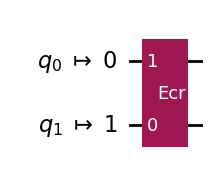

In [368]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2, 2)
circ.ecr(1, 0)
from qiskit import transpile
circ = transpile(circ,backend,optimization_level=0)
circ.draw('mpl', idle_wires=False)



In [369]:
pulse_schedule = schedule(circ,backend=backend)

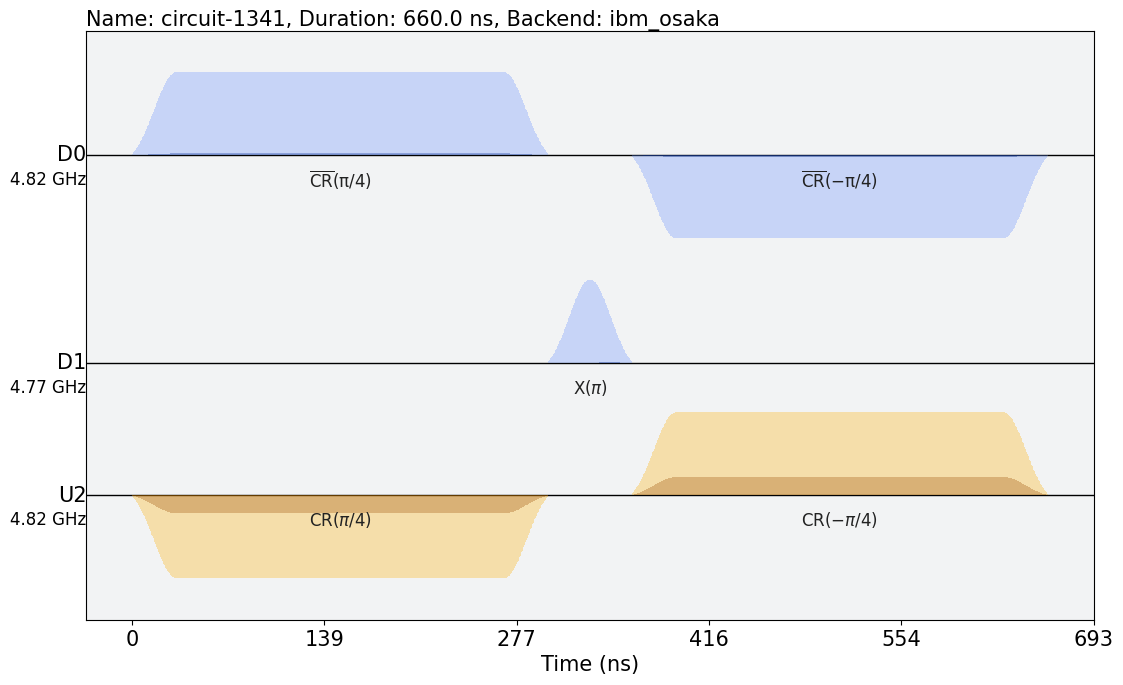

In [370]:
pulse_schedule.draw(backend=backend)

In [346]:
#job = backend.run(circ,optimization_level=0)

In [394]:
qc_list = []
for i in range(20):
  qc = QuantumCircuit(2, 2)
  qc.ecr(1, 0)
  for j in range(i):
    qc.ecr(1, 0)
    qc.ecr(1, 0)
  qc= transpile(qc,backend,optimization_level=0)
  qc_list.append(qc)

hamiltonian = SparsePauliOp.from_list([("ZZ"+"I"*125, 1)])
estimator = Estimator(backend=backend)
data = zip(qc_list, [hamiltonian]*len(qc_list))
# calculate [ <psi(theta1)|hamiltonian|psi(theta)> ]
job = estimator.run(data)
pub_result = job.result()[0]
print(f"Expectation values: {pub_result.data.evs}")

KeyboardInterrupt: 

In [365]:
pulse_schedule = schedule(circ,backend=backend)

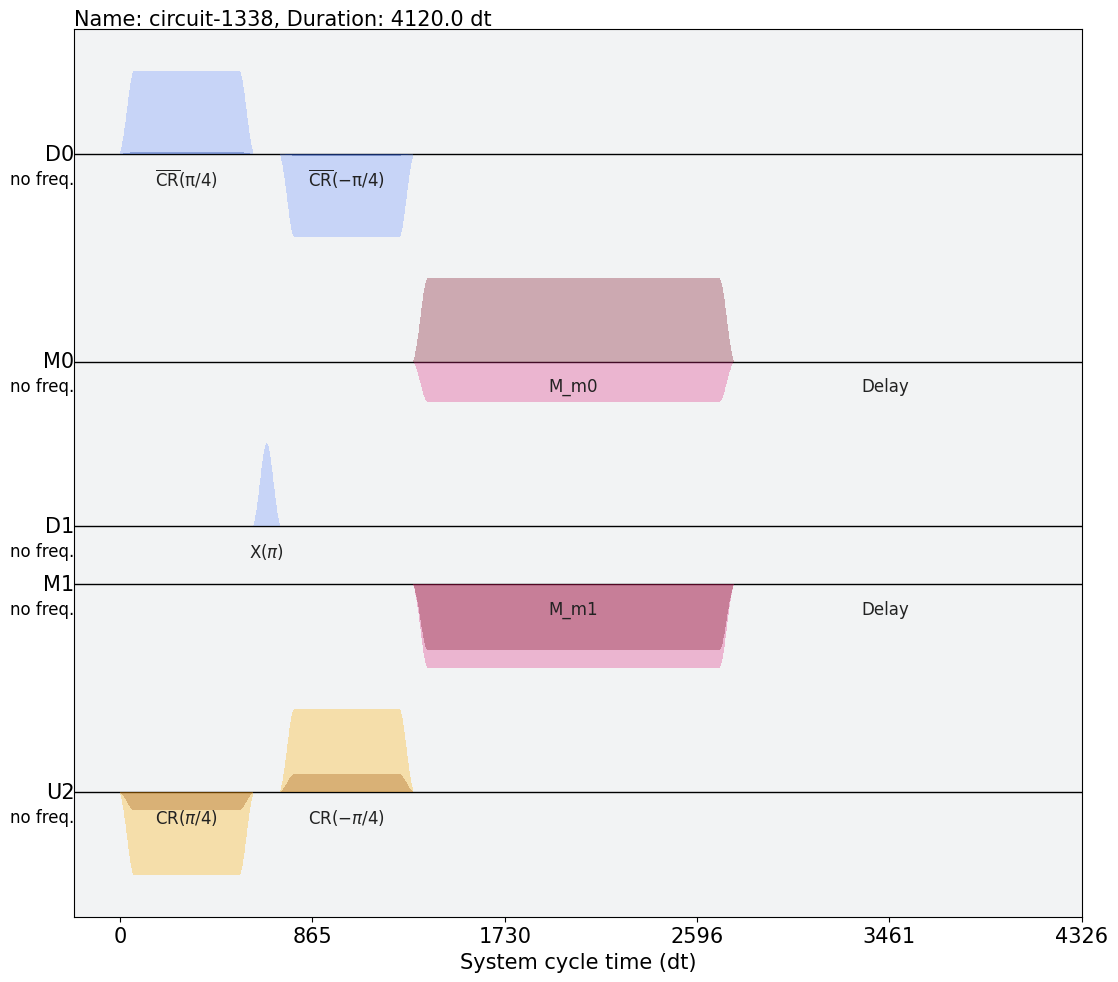

In [366]:
pulse_schedule.draw()

In [392]:
import copy
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

l = [0.2*i+1 for i in range(20) ]
qc_list = []
for i in l:
  pulse_copy = copy.deepcopy(pulse_schedule)

  custom_gate = Gate(f"ecr_err_0_1_{i}", 2, [])
  qc1 = QuantumCircuit(2, 2)
  qc1.append(custom_gate, [0,1])
  qc1.measure(0, 0)
  qc1.measure(1, 1)
  with pulse.build(backend, name='ecr_err_0_1') as my_schedule:
    index=0
    for pul in pulse_copy.instructions:


        pul[1].pulse.duration = int(pul[1].pulse.duration*i)
        pul[1].pulse._params['sigma'] = int(pul[1].pulse._params['sigma']*i)

        try:
          pul[1].pulse._params['width'] = int(pul[1].pulse._params['width']*i)
          pulse.play(pul[1].pulse,pul[1].channel)
          if index<2:
            pulse.delay(pul[1].pulse.duration-pul[1].pulse._params['width'],pul[1].channel)
          index+=1
        except:
          pass

  backend.target.add_instruction(
      custom_gate,
      {(0,1): InstructionProperties(calibration=my_schedule)},
  )
  #backend.target.update_instruction_properties('ecr_err_0_1',(0,1),properties = InstructionProperties(calibration=my_schedule))
  # Re-generate the passmanager with the new backend target
  passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=[0, 1])
  qc1 = passmanager.run(qc1)
  qc_list.append(qc1)




In [393]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp


hamiltonian = SparsePauliOp.from_list([("ZZ"+"I"*125, 1)])
estimator = Estimator(backend=backend)
data = zip(qc_list, [hamiltonian]*len(qc_list))
# calculate [ <psi(theta1)|hamiltonian|psi(theta)> ]
job = estimator.run(data)
#pub_result = job.result()[0]
#print(f"Expectation values: {pub_result.data.evs}")

In [330]:
A = zip(qc_list, [hamiltonian]*len(qc_list))

SyntaxError: can't use starred expression here (<ipython-input-332-6112a1521db1>, line 1)

In [320]:
from qiskit.quantum_info import SparsePauliOp

In [296]:
backend.target.update_instruction_properties('ecr_err_0_1',(0,1),properties = InstructionProperties(calibration=my_schedule))

In [389]:
l = [0.2*i+1 for i in range(20) ]
qc_list = []
for i in l:
  pulse_copy = copy.deepcopy(pulse_schedule)

  custom_gate = Gate(f"ecr_err_0_1_{i}", 2, [])
  qc1 = QuantumCircuit(2, 2)
  qc1.append(custom_gate, [0,1])
  qc1.measure(0, 0)
  qc1.measure(1, 1)
  with pulse.build(backend, name='ecr_err_0_1') as my_schedule:
    index=0
    for pul in pulse_copy.instructions:


        pul[1].pulse.duration = int(pul[1].pulse.duration*i)
        pul[1].pulse._params['sigma'] = int(pul[1].pulse._params['sigma']*i)

        try:
          pul[1].pulse._params['width'] = int(pul[1].pulse._params['width']*i)
          pulse.play(pul[1].pulse,pul[1].channel)
          if index<2:
            pulse.delay(pul[1].pulse.duration-pul[1].pulse._params['width'],pul[1].channel)
          index+=1
        except:
          pass

In [390]:
my_schedule

ScheduleBlock(Play(GaussianSquare(duration=2880, sigma=153, width=2265, amp=0.03317685418568183, angle=0.02052883360514365, name='CR90p_d0_u2'), DriveChannel(0), name='CR90p_d0_u2'), Delay(615, DriveChannel(0)), Play(GaussianSquare(duration=2880, sigma=153, width=2265, amp=0.12738561506974808, angle=-2.9269377589442938, name='CR90p_u2'), ControlChannel(2), name='CR90p_u2'), Delay(615, ControlChannel(2)), Play(GaussianSquare(duration=2880, sigma=153, width=2265, amp=0.03317685418568183, angle=-3.12106381998465, name='CR90m_d0_u2'), DriveChannel(0), name='CR90m_d0_u2'), Play(GaussianSquare(duration=2880, sigma=153, width=2265, amp=0.12738561506974808, angle=0.21465489464549936, name='CR90m_u2'), ControlChannel(2), name='CR90m_u2'), name="ecr_err_0_1", transform=AlignLeft())

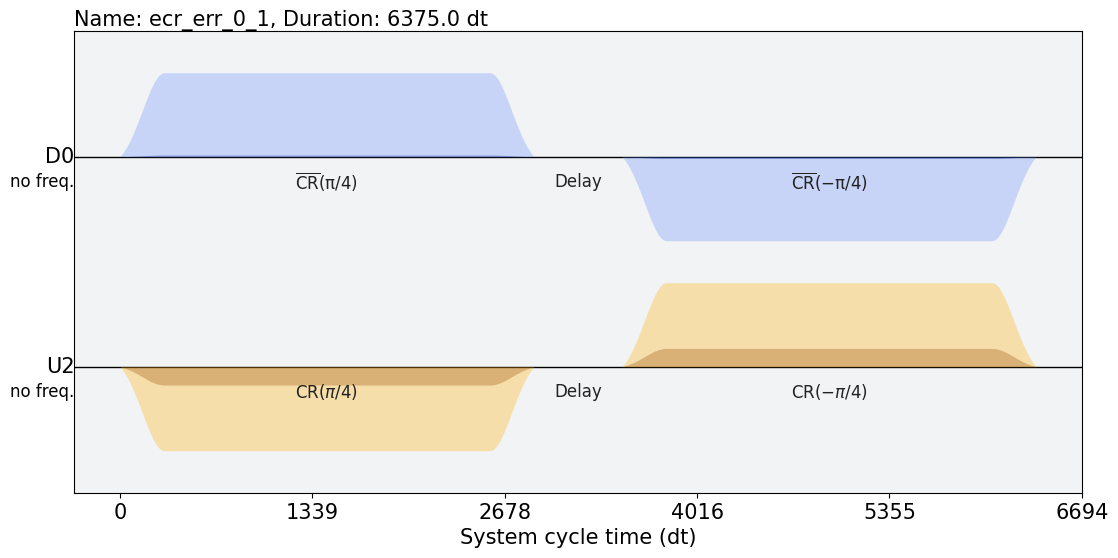

In [391]:
my_schedule.draw()